# 지역별 면적 데이터(2019년 데이터)

In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
area = pd.read_excel('도시·비도시지역_면적현황_20200831113000.xlsx', header=1)
area.head()

,소재지(시군구)별(1),소재지(시군구)별(2),합계 (㎡)
0,전국,소계,106210401153
1,서울특별시,소계,605512630
2,NaN,종로구,23972507
3,NaN,중구,9974292
4,NaN,용산구,21870000


In [3]:
area.isnull().sum()

소재지(시군구)별(1)    229
소재지(시군구)별(2)      0
합계 (㎡)            0
dtype: int64

In [4]:
area.fillna(method='pad', inplace=True)
area.rename(columns = {'소재지(시군구)별(1)':'광역시도', 
                             '소재지(시군구)별(2)':'시군구', 
                             '합계 (㎡)':'면적(k㎡)'}, inplace=True)
area = area[(area['시군구'] != '소계')]

area['면적(k㎡)'] = area['면적(k㎡)']/1000000
area['면적(k㎡)'] = area['면적(k㎡)'].round(2)

area.head()

,광역시도,시군구,면적(k㎡)
2,서울특별시,종로구,23.97
3,서울특별시,중구,9.97
4,서울특별시,용산구,21.87
5,서울특별시,성동구,16.80
6,서울특별시,광진구,17.08


In [5]:
pop = pd.pivot_table(area, 
                     index = ['광역시도', '시군구'], 
                     values = ['면적(k㎡)'])
pop.head()

면적(k㎡)
광역시도 시군구         
강원도  강릉시  1046.88
     고성군   661.48
     동해시   198.17
     삼척시  1191.73
     속초시   110.78

In [6]:
pop.index.get_level_values(1)

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시', '인제군',
       ...
       '단양군', '보은군', '영동군', '옥천군', '음성군', '제천시', '증평군', '진천군', '청주시', '충주시'],
      dtype='object', name='시군구', length=229)

In [7]:
pop.reset_index(inplace=True) 
pop.head()

,광역시도,시군구,면적(k㎡)
0,강원도,강릉시,1046.88
1,강원도,고성군,661.48
2,강원도,동해시,198.17
3,강원도,삼척시,1191.73
4,강원도,속초시,110.78


In [8]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   광역시도    229 non-null    object 
 1   시군구     229 non-null    object 
 2   면적(k㎡)  229 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.5+ KB


# 수정

In [9]:
pop['시군구'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시',
       '사천시', '산청군', '양산시', '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군',
       '함안군', '함양군', '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시',
       '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구',
       '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구', '사하구', '수영구', '연제구',
       '영도구', '해운대구', '강남구', '강동구', '강북구', '관악구', '광진구', '구로구', '금천구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구

In [10]:
si_name = [None] * len(pop) 

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [11]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시군구'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시군구'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시군구'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시군구'][n] in values:
                if len(pop['시군구'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시군구'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시군구'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시군구'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시군구'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시군구'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시군구'][n][:-1]

In [12]:
si_name[3:27]

['삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '김포',
 '남양주']

In [13]:
pop['ID'] = si_name
pop.head()

,광역시도,시군구,면적(k㎡),ID
0,강원도,강릉시,1046.88,강릉
1,강원도,고성군,661.48,고성(강원)
2,강원도,동해시,198.17,동해
3,강원도,삼척시,1191.73,삼척
4,강원도,속초시,110.78,속초


# 지도 만들기

In [14]:
draw_korea_raw = pd.read_excel('C:\\anaconda3_file\\Korea_map_edit.xlsx', 
                              encoding='EUC-KR')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양,고양,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천,안양,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산,서울 양천,서울 관악,서울 서초,성남,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산,서울 영등포,서울 금천,서울 강남,성남,성남,용인,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원,용인,용인,안동,영양,NaN,NaN


In [15]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.head()

0
0 7       철원
  8       화천
  9       양구
  10  고성(강원)
1 3       양주

In [16]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.head()

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [17]:
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea_raw_stacked.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [18]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [19]:
draw_korea = draw_korea_raw_stacked
for idx, row in draw_korea[:5].iterrows():
    print(idx)
    print(row)

0
y      0
x      7
ID    철원
Name: 0, dtype: object
1
y      0
x      8
ID    화천
Name: 1, dtype: object
2
y      0
x      9
ID    양구
Name: 2, dtype: object
3
y          0
x         10
ID    고성(강원)
Name: 3, dtype: object
4
y      1
x      3
ID    양주
Name: 4, dtype: object


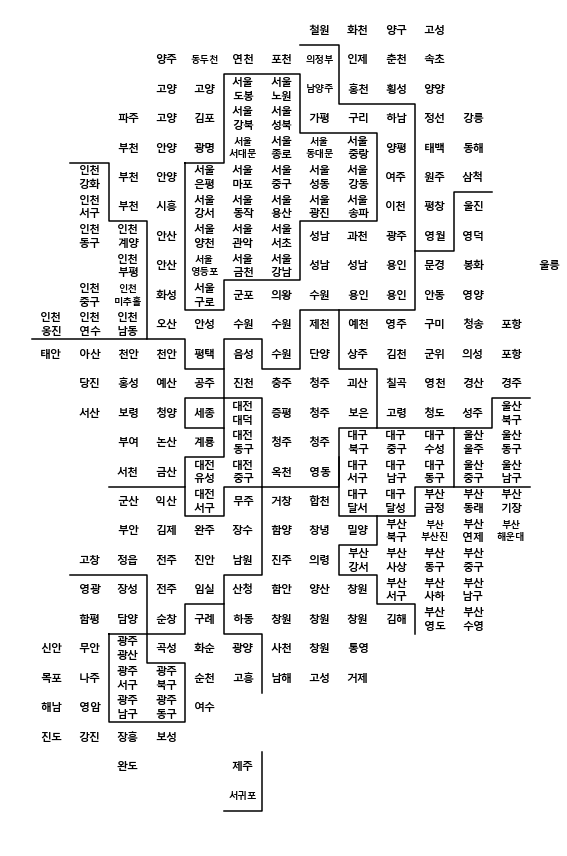

In [20]:
plt.figure(figsize=(8, 12))
# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구 처럼 이름이 3자 이상인 경우에 작은 글자로 표시.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도dml 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)...?

plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set()

In [22]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [23]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시군구,면적(k㎡),ID,y,x
0,강원도,강릉시,1046.88,강릉,3,11
1,강원도,고성군,661.48,고성(강원),0,10
2,강원도,동해시,198.17,동해,4,11
3,강원도,삼척시,1191.73,삼척,5,11
4,강원도,속초시,110.78,속초,1,10


In [24]:
mapdata = pop.pivot_table(index='y', columns='x', values='면적(k㎡)')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,889.43,908.97,661.81,661.48,NaN,NaN,NaN
1,NaN,NaN,NaN,310.24,95.68,695.23,826.44,81.60,1646.25,1116.41,110.78,NaN,NaN,NaN
2,NaN,NaN,NaN,266.41,266.41,20.68,35.55,458.50,1819.84,997.66,630.35,NaN,NaN,NaN
3,NaN,NaN,680.20,266.41,276.59,23.64,24.62,841.45,33.29,93.04,1219.72,1046.88,NaN,NaN
4,NaN,NaN,53.45,58.48,38.51,17.69,23.97,14.25,18.53,877.01,303.57,198.17,NaN,NaN
5,NaN,410.64,53.45,58.48,29.79,23.88,9.97,16.80,24.56,607.70,868.09,1191.73,NaN,NaN
6,NaN,131.51,53.45,135.06,41.46,16.39,21.87,17.08,33.86,461.81,1463.83,989.21,NaN,NaN
7,NaN,7.60,45.55,236.11,17.47,29.56,46.90,141.82,35.85,430.99,1127.62,741.86,NaN,NaN
8,NaN,NaN,31.99,236.11,24.35,13.01,39.50,141.82,141.82,593.09,912.08,1201.03,NaN,73.02


In [25]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75
    
    # 소멸지역이 아닌 곳은 흰색으로 표시 
    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 이름이 3자 이상인 경우에 작은 글자로 표시.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

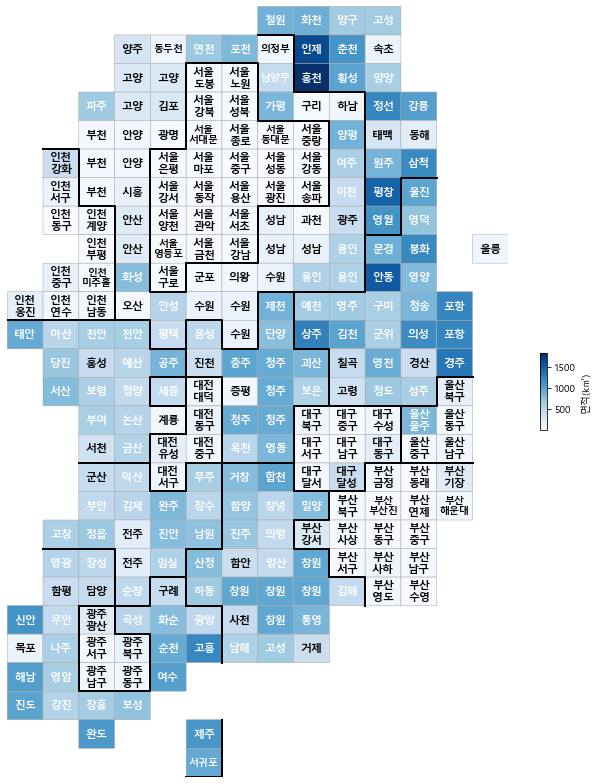

In [26]:
drawKorea('면적(k㎡)', pop, 'Blues')